## Se prueba la optimización random (fuerza bruta) y se cambia el numero de salas a iterar

Usamos la sala de prueba 1

In [1]:
import os
import time
os.chdir('..')

In [2]:
from room.geometry_generator import calculation_of_geometry
from mesh.mesh_3D_complex import create_complex_mesh
from FEM.FEM_source import FEM_Source_Solver_Average
from aux.merit_figure import merit_magnitude_deviation, merit_spatial_deviation
from plots.graph_room_outline import plot_room_outline

import numpy as np
import matplotlib.pyplot as plt

pygame 2.6.1 (SDL 2.28.4, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
# Definimos el cuarto
Lx = 250       # Largo de la sala en X 
Ly = 300       # Largo de la sala en Y
Lz = 220       # Alto de la sala
Dx = 50        # Delta X
Dy = 80        # Delta Y
Dz = 10        # Delta Z

# Posiciones fuente y receptor (en metros)
source_position = (1.9, 1.0, 1.3)
receptor_position = (1.25, 1.9, 1.2)

In [4]:
# Parametros de control
N = 250        # Densidad de la grilla del generador de geometrías
M = 300      # Cantidad de salas a generar
n_walls = 2    # Número de cortes en las paredes
res_freq = 1

In [5]:
# Almacenar toda la data
start_time = time.time()
rooms = calculation_of_geometry(Lx, Ly, Dx, Dy, N, M, n_walls)
mesh = "room_mesh_complex"  # Crear malla con el script correspondiente
mesh1 = "room_mesh_complex1"  # Crear malla con el script correspondiente
mesh2 = "room_mesh_complex2"  # Crear malla con el script correspondiente
mesh3 = "room_mesh_complex3"  # Crear malla con el script correspondiente
mag_responses = []
merit_sv_values = []
merit_md_values = []

# Itera y almacena los valores para encontrar el mejor cuarto
for i in range(M):
    print("Vamos por el room: ", i)

    # Crea la malla de la geometría selecionada
    Z = (Lz - np.random.uniform(0, Dz))/100
    create_complex_mesh(rooms[i], Z, source_position, 80, mesh1)
    create_complex_mesh(rooms[i], Z, source_position, 140, mesh2)
    create_complex_mesh(rooms[i], Z, source_position, 200, mesh3)

    # Evalua la rta en frecuencia para esa sala
    f1 = np.arange(20, 80, res_freq)
    res1 = FEM_Source_Solver_Average(f1, f'mallado/{mesh1}.msh', receptor_position)

    f2 = np.arange(80, 140, res_freq)
    res2 = FEM_Source_Solver_Average(f2, f'mallado/{mesh2}.msh', receptor_position)

    f3 = np.arange(140, 200, res_freq)
    res3 = FEM_Source_Solver_Average(f3, f'mallado/{mesh3}.msh', receptor_position)

    res_tot = np.hstack([res1, res2, res3])
    res_tot_prom = np.sum(res_tot, axis=0) / 7

    # Calcula figuras de mérito
    sv_merit = merit_spatial_deviation(res_tot)
    md_merit = merit_magnitude_deviation(res_tot)
    
    merit_sv_values.append(sv_merit)
    merit_md_values.append(md_merit)
    mag_responses.append(res_tot_prom)

f_tot =  np.hstack([f1, f2, f3])
merit_sv_values = np.array(merit_sv_values)
merit_md_values = np.array(merit_md_values)
merit_general = merit_md_values + merit_sv_values

idx_best_room = np.argmin(merit_general)
idx_worst_room = np.argmax(merit_general)

best_room_mag = mag_responses[idx_best_room]
worst_room_mag = mag_responses[idx_worst_room]
random_room_mag = mag_responses[np.random.randint(0, M - 1)]


Vamos por el room:  0
Info    : Reading 'mallado/room_mesh_complex1.msh'...
Info    : 57 entities
Info    : 542 nodes
Info    : 2870 elements
Info    : Done reading 'mallado/room_mesh_complex1.msh'
Info    : Reading 'mallado/room_mesh_complex2.msh'...
Info    : 57 entities
Info    : 1530 nodes
Info    : 8566 elements
Info    : Done reading 'mallado/room_mesh_complex2.msh'
Info    : Reading 'mallado/room_mesh_complex3.msh'...
Info    : 57 entities
Info    : 4887 nodes
Info    : 28807 elements
Info    : Done reading 'mallado/room_mesh_complex3.msh'
Vamos por el room:  1
Info    : Reading 'mallado/room_mesh_complex1.msh'...
Info    : 57 entities
Info    : 459 nodes
Info    : 2360 elements
Info    : Done reading 'mallado/room_mesh_complex1.msh'
Info    : Reading 'mallado/room_mesh_complex2.msh'...
Info    : 57 entities
Info    : 1397 nodes
Info    : 7682 elements
Info    : Done reading 'mallado/room_mesh_complex2.msh'
Info    : Reading 'mallado/room_mesh_complex3.msh'...
Info    : 57 entit

Resultados con 50 salas (el tiempo fue 13 minutos)

In [6]:
print(f"El valor de mértio mínimo es: {merit_general[idx_best_room]} | Con SV: {merit_sv_values[idx_best_room]} | Con MD: {merit_md_values[idx_best_room]}" )
print("............................")
print(f"El peor valor de mérito es: {merit_general[idx_worst_room]} | Con SV: {merit_sv_values[idx_worst_room]} | Con MD: {merit_md_values[idx_worst_room]}" )
print("............................")
print("El valor de mértio promedio es: ", np.mean(merit_general))
print("............................")
print("El tiempo de ejecución en minutos fue de: ", (time.time() - start_time)/60)

El valor de mértio mínimo es: 14.436345575990682 | Con SV: 3.525438387451828 | Con MD: 10.910907188538854
............................
El peor valor de mérito es: 18.428043143844953 | Con SV: 3.7854942268289897 | Con MD: 14.642548917015963
............................
El valor de mértio promedio es:  16.328501757772656
............................
El tiempo de ejecución en minutos fue de:  17.482112316290536


In [7]:
from complex_outline_optim import calculate_initial

merit_0, mag0 = calculate_initial(Lx/100, Ly/100, Lz/100, source_position, receptor_position)
freq_base = np.arange(20, 200, 1)
merit_0

Info    : Reading 'mallado/room_base_optim1.msh'...
Info    : 33 entities
Info    : 705 nodes
Info    : 3928 elements
Info    : Done reading 'mallado/room_base_optim1.msh'
Info    : Reading 'mallado/room_base_optim2.msh'...
Info    : 33 entities
Info    : 1858 nodes
Info    : 10518 elements
Info    : Done reading 'mallado/room_base_optim2.msh'
Info    : Reading 'mallado/room_base_optim3.msh'...
Info    : 33 entities
Info    : 6201 nodes
Info    : 36807 elements
Info    : Done reading 'mallado/room_base_optim3.msh'


(15.935706884213301, 12.540030814890079, 3.3956760693232226)

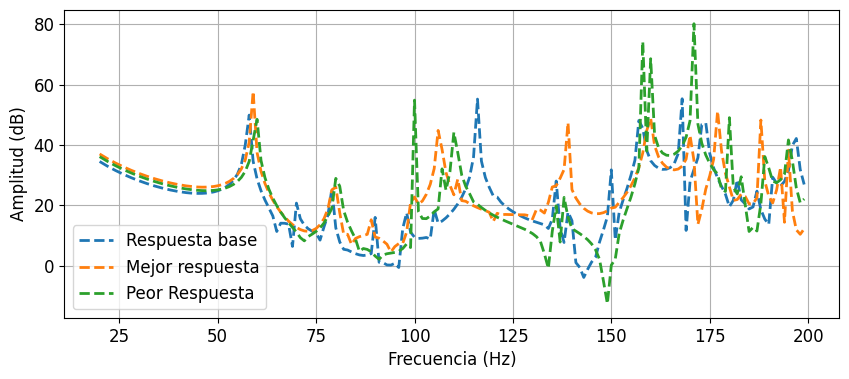

In [8]:
from plots.graph_mag_response import mag_response_comparison

freqs_res1 = np.arange(20, 200, 1)
mags = [(freqs_res1, mag0, "Respuesta base"), (f_tot, best_room_mag, "Mejor respuesta"), (f_tot, worst_room_mag, "Peor Respuesta")]
mag_response_comparison(mags)

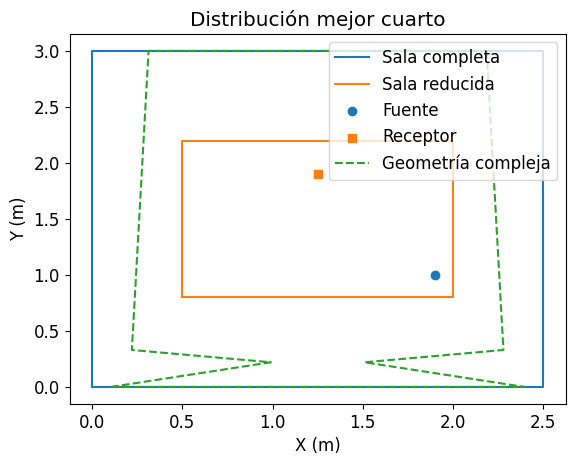

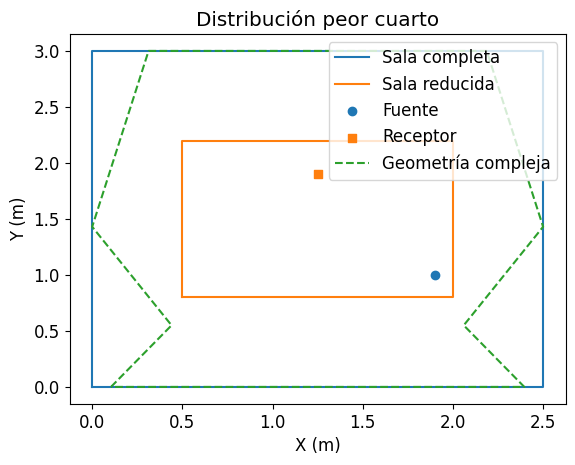

La mejor sala es:  [[0.10416667 0.        ]
 [0.99       0.22      ]
 [0.22       0.33      ]
 [0.3125     3.        ]
 [2.1875     3.        ]
 [2.28       0.33      ]
 [1.51       0.22      ]
 [2.39583333 0.        ]]
............................
La peor sala es:  [[0.10416667 0.        ]
 [0.44       0.55      ]
 [0.         1.43      ]
 [0.3125     3.        ]
 [2.1875     3.        ]
 [2.5        1.43      ]
 [2.06       0.55      ]
 [2.39583333 0.        ]]


In [9]:
plot_room_outline(Lx, Ly, Dx, Dy, source_position, receptor_position, rooms[idx_best_room], "Distribución mejor cuarto")
plot_room_outline(Lx, Ly, Dx, Dy, source_position, receptor_position, rooms[idx_worst_room], "Distribución peor cuarto")

print("La mejor sala es: ", rooms[idx_best_room])
print("............................")
print("La peor sala es: ", rooms[idx_worst_room])

Resultado para 100 salas (tomo 25 minutos)

In [12]:
print(f"El valor de mértio mínimo es: {merit_general[idx_best_room]} | Con SV: {merit_sv_values[idx_best_room]} | Con MD: {merit_md_values[idx_best_room]}" )
print("............................")
print(f"El peor valor de mérito es: {merit_general[idx_worst_room]} | Con SV: {merit_sv_values[idx_worst_room]} | Con MD: {merit_md_values[idx_worst_room]}" )
print("............................")
print("El valor de mértio promedio es: ", np.mean(merit_general))
print("............................")
print("El tiempo de ejecución en minutos fue de: ", (time.time() - start_time)/60)

El valor de mértio mínimo es: 13.567548586517614 | Con SV: 2.9677190015290256 | Con MD: 10.599829584988589
............................
El peor valor de mérito es: 19.185211554558972 | Con SV: 4.330806464242216 | Con MD: 14.854405090316755
............................
El valor de mértio promedio es:  16.26509630173417
............................
El tiempo de ejecución en minutos fue de:  29.995527883370716


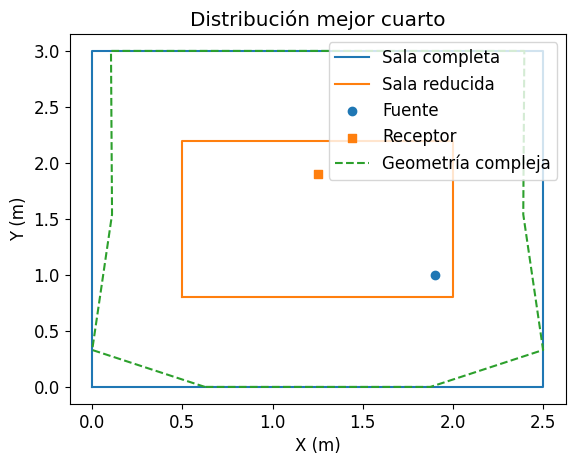

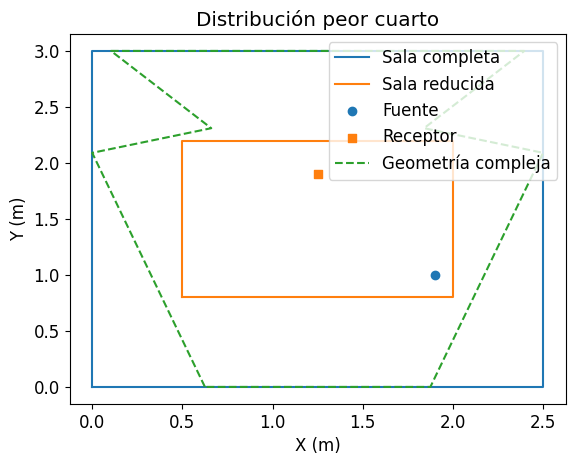

La mejor sala es:  [[0.625      0.        ]
 [0.         0.33      ]
 [0.11       1.54      ]
 [0.10416667 3.        ]
 [2.39583333 3.        ]
 [2.39       1.54      ]
 [2.5        0.33      ]
 [1.875      0.        ]]
............................
La peor sala es:  [[0.625      0.        ]
 [0.         2.09      ]
 [0.66       2.31      ]
 [0.10416667 3.        ]
 [2.39583333 3.        ]
 [1.84       2.31      ]
 [2.5        2.09      ]
 [1.875      0.        ]]


In [13]:
plot_room_outline(Lx, Ly, Dx, Dy, source_position, receptor_position, rooms[idx_best_room], "Distribución mejor cuarto")
plot_room_outline(Lx, Ly, Dx, Dy, source_position, receptor_position, rooms[idx_worst_room], "Distribución peor cuarto")

print("La mejor sala es: ", rooms[idx_best_room])
print("............................")
print("La peor sala es: ", rooms[idx_worst_room])

Resultado con 150 salas

In [17]:
print(f"El valor de mértio mínimo es: {merit_general[idx_best_room]} | Con SV: {merit_sv_values[idx_best_room]} | Con MD: {merit_md_values[idx_best_room]}" )
print("............................")
print(f"El peor valor de mérito es: {merit_general[idx_worst_room]} | Con SV: {merit_sv_values[idx_worst_room]} | Con MD: {merit_md_values[idx_worst_room]}" )
print("............................")
print("El valor de mértio promedio es: ", np.mean(merit_general))
print("............................")
print("El tiempo de ejecución en minutos fue de: ", (time.time() - start_time)/60)

El valor de mértio mínimo es: 14.23067390546982 | Con SV: 3.416493966917781 | Con MD: 10.814179938552039
............................
El peor valor de mérito es: 21.539823019641688 | Con SV: 5.014071234410941 | Con MD: 16.525751785230746
............................
El valor de mértio promedio es:  17.08800682558826
............................
El tiempo de ejecución en minutos fue de:  38.065536944071454


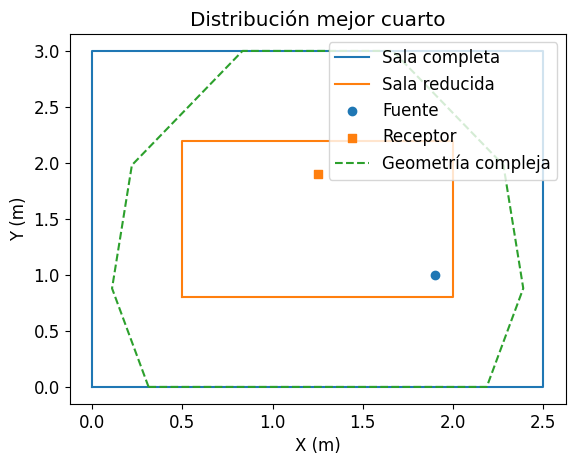

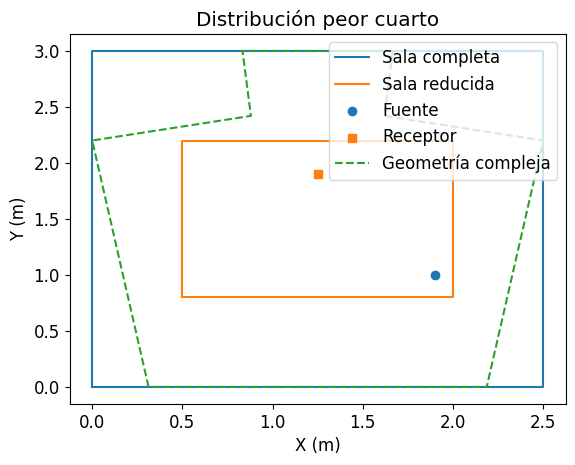

La mejor sala es:  [[0.3125     0.        ]
 [0.11       0.88      ]
 [0.22       1.98      ]
 [0.83333333 3.        ]
 [1.66666667 3.        ]
 [2.28       1.98      ]
 [2.39       0.88      ]
 [2.1875     0.        ]]
............................
La peor sala es:  [[0.3125     0.        ]
 [0.         2.2       ]
 [0.88       2.42      ]
 [0.83333333 3.        ]
 [1.66666667 3.        ]
 [1.62       2.42      ]
 [2.5        2.2       ]
 [2.1875     0.        ]]


In [18]:
plot_room_outline(Lx, Ly, Dx, Dy, source_position, receptor_position, rooms[idx_best_room], "Distribución mejor cuarto")
plot_room_outline(Lx, Ly, Dx, Dy, source_position, receptor_position, rooms[idx_worst_room], "Distribución peor cuarto")

print("La mejor sala es: ", rooms[idx_best_room])
print("............................")
print("La peor sala es: ", rooms[idx_worst_room])

Iteración con 250 Salas (1hs)

In [6]:
print(f"El valor de mértio mínimo es: {merit_general[idx_best_room]} | Con SV: {merit_sv_values[idx_best_room]} | Con MD: {merit_md_values[idx_best_room]}" )
print("............................")
print(f"El peor valor de mérito es: {merit_general[idx_worst_room]} | Con SV: {merit_sv_values[idx_worst_room]} | Con MD: {merit_md_values[idx_worst_room]}" )
print("............................")
print("El valor de mértio promedio es: ", np.mean(merit_general))
print("............................")
print("El tiempo de ejecución en minutos fue de: ", (time.time() - start_time)/60)

El valor de mértio mínimo es: 13.281772637599278 | Con SV: 2.8003109886922024 | Con MD: 10.481461648907075
............................
El peor valor de mérito es: 21.23071423021313 | Con SV: 5.9812377904352285 | Con MD: 15.249476439777903
............................
El valor de mértio promedio es:  16.602724771738174
............................
El tiempo de ejecución en minutos fue de:  73.53687322537104


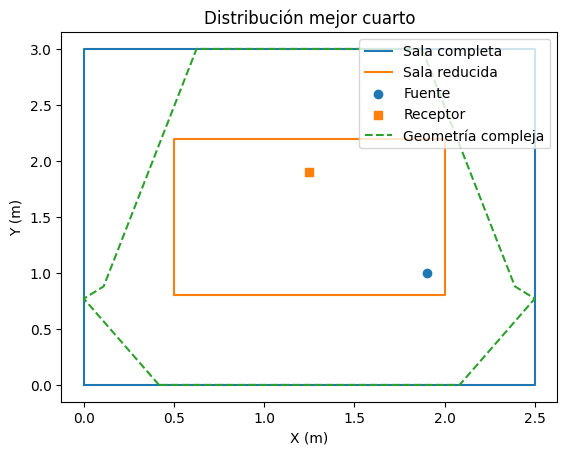

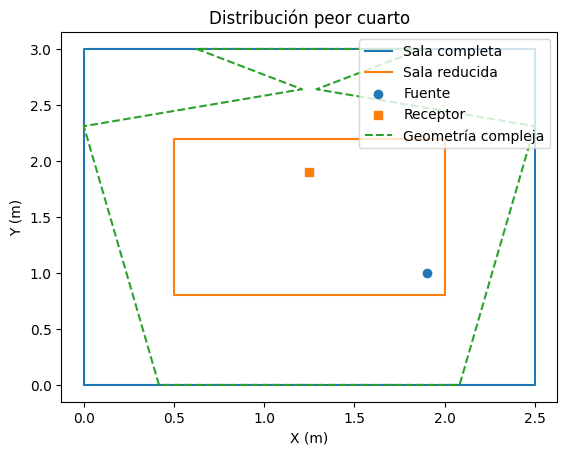

La mejor sala es:  [[0.41666667 0.        ]
 [0.         0.77      ]
 [0.11       0.88      ]
 [0.625      3.        ]
 [1.875      3.        ]
 [2.39       0.88      ]
 [2.5        0.77      ]
 [2.08333333 0.        ]]
............................
La peor sala es:  [[0.41666667 0.        ]
 [0.         2.31      ]
 [1.21       2.64      ]
 [0.625      3.        ]
 [1.875      3.        ]
 [1.29       2.64      ]
 [2.5        2.31      ]
 [2.08333333 0.        ]]


In [7]:
plot_room_outline(Lx, Ly, Dx, Dy, source_position, receptor_position, rooms[idx_best_room], "Distribución mejor cuarto")
plot_room_outline(Lx, Ly, Dx, Dy, source_position, receptor_position, rooms[idx_worst_room], "Distribución peor cuarto")

print("La mejor sala es: ", rooms[idx_best_room])
print("............................")
print("La peor sala es: ", rooms[idx_worst_room])

Itreación 300 salas

In [6]:
print(f"El valor de mértio mínimo es: {merit_general[idx_best_room]} | Con SV: {merit_sv_values[idx_best_room]} | Con MD: {merit_md_values[idx_best_room]}" )
print("............................")
print(f"El peor valor de mérito es: {merit_general[idx_worst_room]} | Con SV: {merit_sv_values[idx_worst_room]} | Con MD: {merit_md_values[idx_worst_room]}" )
print("............................")
print("El valor de mértio promedio es: ", np.mean(merit_general))
print("............................")
print("El tiempo de ejecución en minutos fue de: ", (time.time() - start_time)/60)

El valor de mértio mínimo es: 13.969449029595376 | Con SV: 3.093407525060776 | Con MD: 10.8760415045346
............................
El peor valor de mérito es: 21.25139254447354 | Con SV: 4.512009988042773 | Con MD: 16.739382556430765
............................
El valor de mértio promedio es:  17.01935284940625
............................
El tiempo de ejecución en minutos fue de:  80.50561726888021


In [1]:
plot_room_outline(Lx, Ly, Dx, Dy, source_position, receptor_position, rooms[idx_best_room], "Distribución mejor cuarto")
plot_room_outline(Lx, Ly, Dx, Dy, source_position, receptor_position, rooms[idx_worst_room], "Distribución peor cuarto")

print("La mejor sala es: ", rooms[idx_best_room])
print("............................")
print("La peor sala es: ", rooms[idx_worst_room])

NameError: name 'plot_room_outline' is not defined